In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
data = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
data = data.rename(columns={
    'Annual Income (k$)': 'AnnualIncome',
    'Spending Score (1-100)': 'SpendingScore'
})

# Display the first few rows to confirm changes
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# describe data
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
AnnualIncome,0
SpendingScore,0


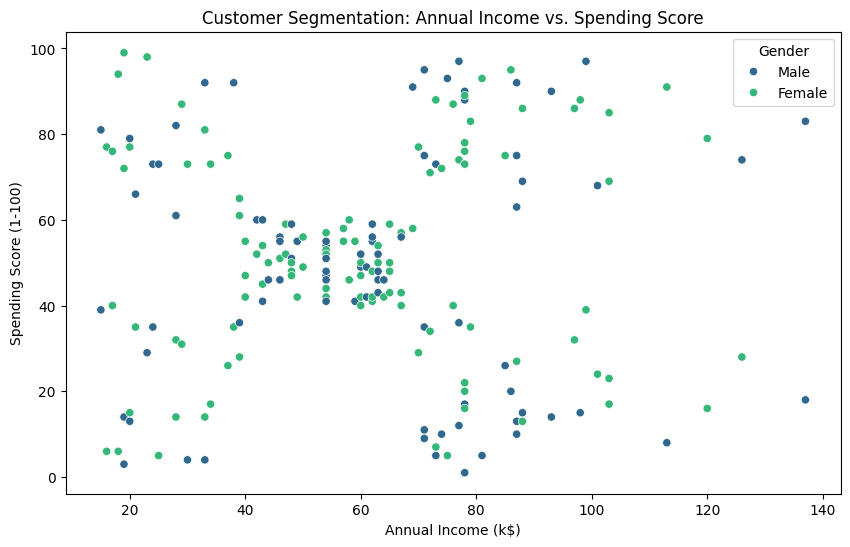

In [6]:
# make an insightful visualization and explain
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Gender', palette='viridis')
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

# Customer distribution based on Annual Income and Spending Score, segmented by Gender.
# We observe distinct groups: high-income, high-spending customers are potential targets for
# premium offerings, while low-income, high-spending customers may represent loyal, budget-conscious buyers.
# Gender appears evenly distributed, indicating no significant spending pattern difference between males and females in this dataset.

In [ ]:
# make an insightful visualization and explain


## Data Preprocessing

For this case study, we only use income and spending score

In [7]:
# create new dataframe that consist only annual income and spending score
df = data[['AnnualIncome', 'SpendingScore']]
df.head()

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [8]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [9]:
# get stastical information on the new dataset

df_scaled.describe()

,AnnualIncome,SpendingScore
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

<ipython-input-13-c22f09bbacc9>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore', palette='viridis')


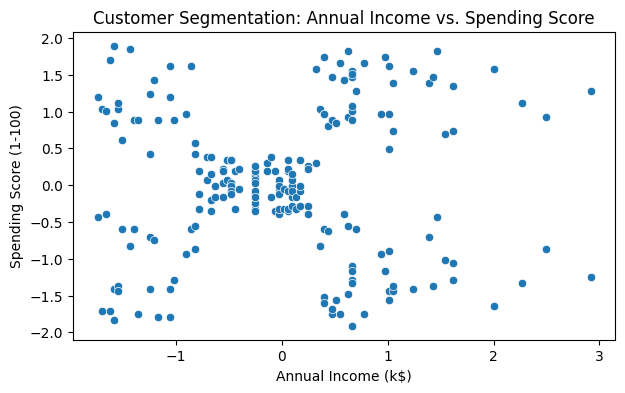

In [13]:
# Visualize the position
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df_scaled, x='AnnualIncome', y='SpendingScore', palette='viridis')
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


<ipython-input-14-38d4229e1ac8>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', palette='viridis')


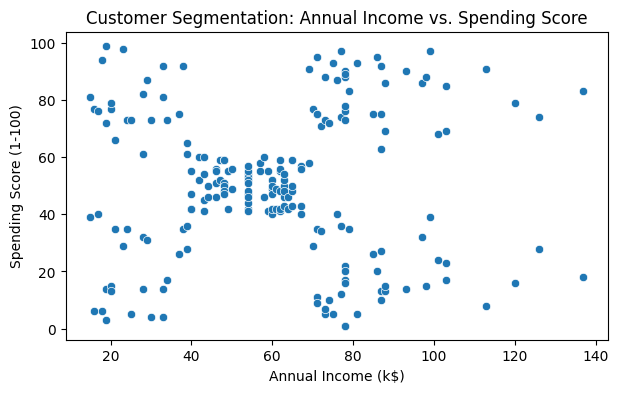

In [14]:
# Visualize the position using the original scale
plt.figure(figsize=(7, 4))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', palette='viridis')
plt.title('Customer Segmentation: Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [16]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

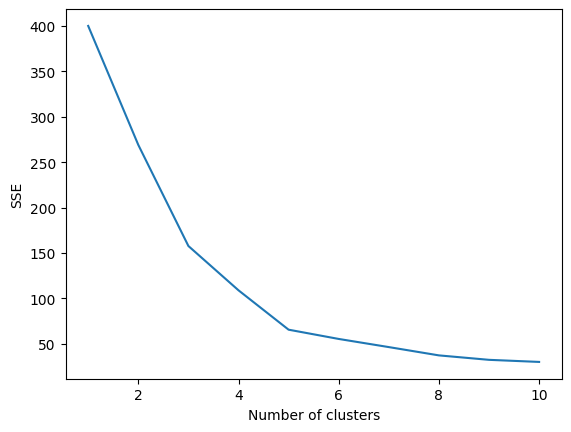

In [17]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [18]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for you model is ",kl.elbow)

The best k for you model is  5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [21]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, n_init= 300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

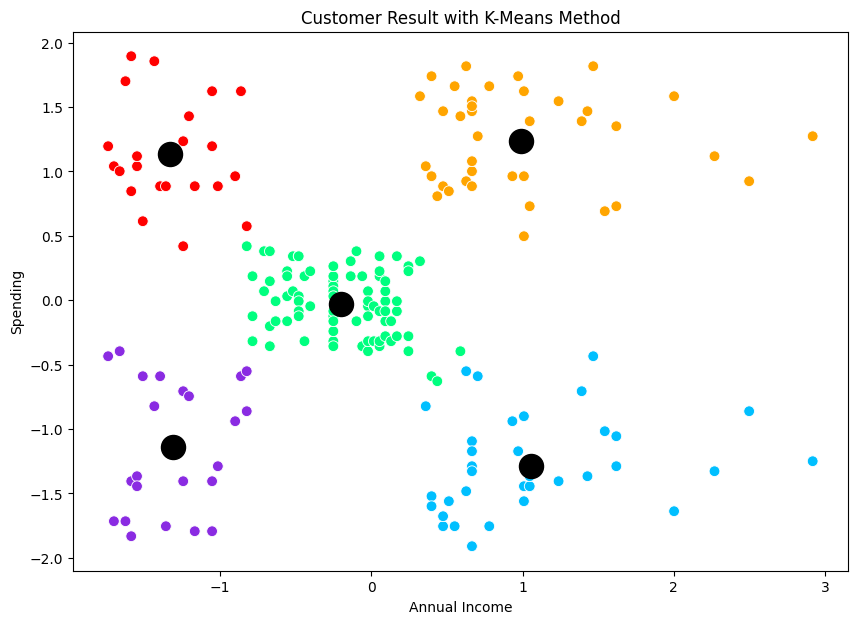

In [22]:
# visualize the result using scater chart
plt.figure(figsize=(10, 7))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', hue=y_pred, palette=["blueviolet",
                                                                          "red",
                                                                          "deepskyblue",
                                                                          "orange",
                                                                          "springgreen"],
                legend=None, data=df_scaled, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.ylabel("Spending")
plt.xlabel("Annual Income")
plt.title('Customer Result with K-Means Method')
plt.show()

In [24]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['Cluster'] = y_pred
df_inverse.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [25]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({
    'SpendingScore': ['mean','std','min','max'],
    'AnnualIncome': ['mean','std','min','max']})
cluster_summary = cluster_summary.rename_axis('Cluster')
cluster_summary

SpendingScore                    AnnualIncome                    
                 mean        std min max         mean        std min  max
Cluster                                                                  
0           20.913043  13.017167   3  40    26.304348   7.893811  15   39
1           79.363636  10.504174  61  99    25.727273   7.566731  15   39
2           17.114286   9.952154   1  39    88.200000  16.399067  70  137
3           82.128205   9.364489  63  97    86.538462  16.312485  69  137
4           49.518519   6.530909  34  61    55.296296   8.988109  39   76

## Conclusion

Cluster 0: Low spending score 20.9 and low annual income 26.3. This group likely represents budget-conscious or low-engagement customers with limited purchasing power. Companies may consider offering or products at affordable prices for them.

Cluster 1: High spending score 79.4 but low annual income  25.7. These are loyal customers who prioritize spending at the mall despite having lower income, possibly a key segment for loyalty rewards or discounts.

Cluster 2: Low spending score 17.1 but high annual income 88.2. These high-income customers are spending less, indicating potential for growth through targeted promotions or premium offerings to boost engagement.

Cluster 3: High spending score 82.1 and high annual income 86.5. This is a high-value segment with both the means and tendency to spend, ideal for exclusive, premium products and services.

Cluster 4: Moderate spending score 49.5 and moderate annual income 55.3. This segment includes average spenders who could benefit from general promotions or seasonal offers to increase their spending.


Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>